# Projet 3

The "Santé publique France" agency is launching a call for projects to find innovative ideas for food-related applications. You want to participate and suggest an app idea.

I decided to create an application that calculates the sugar level of different products for diabetics.

This first notebook will clean the data.
The second is an exploration notebook.

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [49]:
path = "openfoodfactsorgproducts.csv"

In [50]:
open_food_fact = pd.read_csv(path, sep="\t")

C:\Users\houda\AppData\Local\Temp\ipykernel_6352\3051908425.py:1: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,35,36,37,38,39,48) have mixed types. Specify dtype option on import or set low_memory=False.
  open_food_fact = pd.read_csv(path, sep="\t")


## I – Data cleaning

### 1 - First analysis of the dataframe

In [51]:
open_food_fact.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,3087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,4559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,16087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,16094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
open_food_fact.shape

(320772, 162)

In [53]:
open_food_fact.drop_duplicates()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,3087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,4559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,16087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,16094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320767,9948282780603,http://world-fr.openfoodfacts.org/produit/9948...,openfoodfacts-contributors,1490631299,2017-03-27T16:14:59Z,1491244498,2017-04-03T18:34:58Z,Tomato & ricotta,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320768,99567453,http://world-fr.openfoodfacts.org/produit/9956...,usda-ndb-import,1489059076,2017-03-09T11:31:16Z,1491244499,2017-04-03T18:34:59Z,"Mint Melange Tea A Blend Of Peppermint, Lemon ...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
320769,9970229501521,http://world-fr.openfoodfacts.org/produit/9970...,tomato,1422099377,2015-01-24T11:36:17Z,1491244499,2017-04-03T18:34:59Z,乐吧泡菜味薯片,Leba pickle flavor potato chips,50 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320770,9980282863788,http://world-fr.openfoodfacts.org/produit/9980...,openfoodfacts-contributors,1492340089,2017-04-16T10:54:49Z,1492340089,2017-04-16T10:54:49Z,Tomates aux Vermicelles,NaN,67g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
open_food_fact.isnull().sum()

code                           23
url                            23
creator                         2
created_t                       3
created_datetime                9
                            ...  
carbon-footprint_100g      320504
nutrition-score-fr_100g     99562
nutrition-score-uk_100g     99562
glycemic-index_100g        320772
water-hardness_100g        320772
Length: 162, dtype: int64

In [55]:
open_food_fact.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Columns: 162 entries, code to water-hardness_100g
dtypes: float64(106), object(56)
memory usage: 396.5+ MB


In [56]:
open_food_fact.columns

Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name',
       'generic_name', 'quantity',
       ...
       'ph_100g', 'fruits-vegetables-nuts_100g',
       'collagen-meat-protein-ratio_100g', 'cocoa_100g', 'chlorophyl_100g',
       'carbon-footprint_100g', 'nutrition-score-fr_100g',
       'nutrition-score-uk_100g', 'glycemic-index_100g',
       'water-hardness_100g'],
      dtype='object', length=162)

### 2 - Application idea.

We start by selecting the useful indicators to have the consumption of sugar by food. So I took all the sugars and their derivatives as well as the different information that could be useful for the consumer and the nutriscore.

In [57]:
selection =  ["code", "product_name", "pnns_groups_1", "countries_tags", "countries_fr", "carbohydrates_100g", "sugars_100g", "sucrose_100g", "glucose_100g", "fructose_100g", "lactose_100g", "maltose_100g", "nutrition-score-fr_100g", "energy_100g","proteins_100g", "nutrition_grade_fr"]

In [58]:
open_food_fact1 = open_food_fact[selection]

In [59]:
open_food_fact1.isnull().sum()

code                           23
product_name                17762
pnns_groups_1              229259
countries_tags                280
countries_fr                  280
carbohydrates_100g          77184
sugars_100g                 75801
sucrose_100g               320700
glucose_100g               320746
fructose_100g              320734
lactose_100g               320510
maltose_100g               320768
nutrition-score-fr_100g     99562
energy_100g                 59659
proteins_100g               60850
nutrition_grade_fr          99562
dtype: int64

In [60]:
open_food_fact1.head()

,code,product_name,pnns_groups_1,countries_tags,countries_fr,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,nutrition-score-fr_100g,energy_100g,proteins_100g,nutrition_grade_fr
0,3087,Farine de blé noir,NaN,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,Banana Chips Sweetened (Whole),NaN,en:united-states,États-Unis,64.29,14.29,NaN,NaN,NaN,NaN,NaN,14.0,2243.0,3.57,d
2,4559,Peanuts,NaN,en:united-states,États-Unis,60.71,17.86,NaN,NaN,NaN,NaN,NaN,0.0,1941.0,17.86,b
3,16087,Organic Salted Nut Mix,NaN,en:united-states,États-Unis,17.86,3.57,NaN,NaN,NaN,NaN,NaN,12.0,2540.0,17.86,d
4,16094,Organic Polenta,NaN,en:united-states,États-Unis,77.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1552.0,8.57,NaN


### 2 - Treatment of outliers

To deal with outliers for quantitative variables:
I decided to take all the values above 100 and below 0 since these are values that must be between 0 and 100 grams then I deleted them.


In [61]:
open_food_fact1['pnns_groups_1'] = open_food_fact1['pnns_groups_1'].apply(lambda x: str(x).replace('-', ' '))
open_food_fact1['pnns_groups_1'] = open_food_fact1['pnns_groups_1'].str.lower()
open_food_fact1['pnns_groups_1'] = open_food_fact1['pnns_groups_1'].str.strip()

C:\Users\houda\AppData\Local\Temp\ipykernel_6352\3799120611.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  open_food_fact1['pnns_groups_1'] = open_food_fact1['pnns_groups_1'].apply(lambda x: str(x).replace('-', ' '))
C:\Users\houda\AppData\Local\Temp\ipykernel_6352\3799120611.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  open_food_fact1['pnns_groups_1'] = open_food_fact1['pnns_groups_1'].str.lower()
C:\Users\houda\AppData\Local\Temp\ipykernel_6352\3799120611.py:3: SettingWithCopyWarning: 
A value

In [62]:
a = open_food_fact1[open_food_fact1.pnns_groups_1.str.contains('unknow')]

In [63]:
open_food_fact1.pnns_groups_1.unique()

array(['nan', 'unknown', 'fruits and vegetables', 'sugary snacks',
       'cereals and potatoes', 'composite foods', 'fish meat eggs',
       'beverages', 'fat and sauces', 'milk and dairy products',
       'salty snacks'], dtype=object)

In [64]:
open_food_fact1

,code,product_name,pnns_groups_1,countries_tags,countries_fr,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,nutrition-score-fr_100g,energy_100g,proteins_100g,nutrition_grade_fr
0,3087,Farine de blé noir,nan,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,Banana Chips Sweetened (Whole),nan,en:united-states,États-Unis,64.29,14.29,NaN,NaN,NaN,NaN,NaN,14.0,2243.0,3.57,d
2,4559,Peanuts,nan,en:united-states,États-Unis,60.71,17.86,NaN,NaN,NaN,NaN,NaN,0.0,1941.0,17.86,b
3,16087,Organic Salted Nut Mix,nan,en:united-states,États-Unis,17.86,3.57,NaN,NaN,NaN,NaN,NaN,12.0,2540.0,17.86,d
4,16094,Organic Polenta,nan,en:united-states,États-Unis,77.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1552.0,8.57,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320767,9948282780603,Tomato & ricotta,nan,en:romania,Roumanie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320768,99567453,"Mint Melange Tea A Blend Of Peppermint, Lemon ...",nan,en:united-states,États-Unis,0.00,0.00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.00,b
320769,9970229501521,乐吧泡菜味薯片,salty snacks,en:china,Chine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320770,9980282863788,Tomates aux Vermicelles,nan,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
groups = list(open_food_fact1['pnns_groups_1'].unique())

In [66]:
groups

['nan',
 'unknown',
 'fruits and vegetables',
 'sugary snacks',
 'cereals and potatoes',
 'composite foods',
 'fish meat eggs',
 'beverages',
 'fat and sauces',
 'milk and dairy products',
 'salty snacks']

In [67]:
#sugars= ["carbohydrates_100g", "sugars_100g"]
#for elmt in groups:
#    group = groups[elmt]
#    for e in sugars:
#        Q3 = np.quantile(open_food_fact1[open_food_fact1["pnns_groups_1"] == elmt][e], 0.75)
#        Q1 = np.quantile(open_food_fact1[open_food_fact1["pnns_groups_1"] == elmt][e], 0.75)
#        IQR = Q3 - Q1
#        iter = []
#        for i in index:
#            if (open_food_fact1.loc[i,'carbohydrates_100g'] < Q1 - IQR * 1,5) or (open_food_fact1.loc[i,'carbohydrates_100g'] > Q3 - IQR * 1,5):
#                open_food_fact1.[i, e].replace(to_replace=open_food_fact1.[i, e], value=np.nan)
        #print([group[e] > Q3 + IQR * 1,5])
        #open_food_fact1[group[e] > Q3 + IQR * 1,5].index
        #open_food_fact1.drop(group[group[e] < Q1 - IQR * 1,5].index, inplace=True)

In [68]:
open_food_fact1

,code,product_name,pnns_groups_1,countries_tags,countries_fr,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,nutrition-score-fr_100g,energy_100g,proteins_100g,nutrition_grade_fr
0,3087,Farine de blé noir,nan,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,Banana Chips Sweetened (Whole),nan,en:united-states,États-Unis,64.29,14.29,NaN,NaN,NaN,NaN,NaN,14.0,2243.0,3.57,d
2,4559,Peanuts,nan,en:united-states,États-Unis,60.71,17.86,NaN,NaN,NaN,NaN,NaN,0.0,1941.0,17.86,b
3,16087,Organic Salted Nut Mix,nan,en:united-states,États-Unis,17.86,3.57,NaN,NaN,NaN,NaN,NaN,12.0,2540.0,17.86,d
4,16094,Organic Polenta,nan,en:united-states,États-Unis,77.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1552.0,8.57,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320767,9948282780603,Tomato & ricotta,nan,en:romania,Roumanie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320768,99567453,"Mint Melange Tea A Blend Of Peppermint, Lemon ...",nan,en:united-states,États-Unis,0.00,0.00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.00,b
320769,9970229501521,乐吧泡菜味薯片,salty snacks,en:china,Chine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320770,9980282863788,Tomates aux Vermicelles,nan,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
[open_food_fact1['carbohydrates_100g'] > 100].index

<function list.index(value, start=0, stop=9223372036854775807, /)>

In [70]:
def computeOutliers(value:str, dataframe:pd.DataFrame, category:str, columns:list[str], outliers:dict[str, pd.DataFrame]) -> None:

    # Formatage du nom de la sortie
    formatted_name = 'outliers_{}'.format(value)

    # Vérification si la sortie existe déjà dans le dictionnaire des valeurs aberrantes
    df = outliers.get(formatted_name)

    # Si la sortie n'existe pas, on la calcule et on l'ajoute au dictionnaire des valeurs aberrantes
    if df is None:

        # Calcul des statistiques descriptives pour les colonnes spécifiées dans "columns"
        # Si "value" est "all", on calcule les statistiques descriptives pour l'ensemble du DataFrame
        if value == 'all':
            df = dataframe[columns].describe().T
        # Sinon, on calcule les statistiques descriptives pour les données appartenant à la catégorie spécifiée dans "category"
        else:
            df = dataframe.loc[dataframe[category]==value, columns].describe().T

        # Calcul de l'écart interquartile (IQR) pour chaque colonne
        df['iqr'] = df['75%'] - df['25%']

        # Calcul des limites supérieure et inférieure pour chaque colonne en utilisant la formule Q1 - 1,5*IQR pour la limite inférieure et Q3 + 1,5*IQR pour la limite supérieure
        df['q1-1.5iqr'] = df['25%']-1.5*df['iqr']
        df['q3+1.5iqr'] = df['75%']+1.5*df['iqr']

        # Comptage du nombre de valeurs aberrantes pour chaque colonne en utilisant les limites supérieure et inférieure calculées
        # Le nombre de valeurs aberrantes et le pourcentage de valeurs aberrantes sont ajoutés au DataFrame
        df['outliers_count']=0
        for idx in df.index:
            if value == 'all':
                df.loc[idx, 'outliers_count'] = dataframe.loc[(dataframe[idx]<df['q1-1.5iqr'][idx]) | (dataframe[idx]>df['q3+1.5iqr'][idx]), :].shape[0]
            else:
                df.loc[idx, 'outliers_count'] = dataframe.loc[(dataframe[category]==value) & ((dataframe[idx]<df['q1-1.5iqr'][idx]) | (dataframe[idx]>df['q3+1.5iqr'][idx])), :].shape[0]
        df['outliers_percentage']=round(df['outliers_count']/df['count']*100, 2)

        # Ajout du DataFrame au dictionnaire des valeurs aberrantes
        outliers[formatted_name] = df


In [71]:
open_food_fact1.columns

Index(['code', 'product_name', 'pnns_groups_1', 'countries_tags',
       'countries_fr', 'carbohydrates_100g', 'sugars_100g', 'sucrose_100g',
       'glucose_100g', 'fructose_100g', 'lactose_100g', 'maltose_100g',
       'nutrition-score-fr_100g', 'energy_100g', 'proteins_100g',
       'nutrition_grade_fr'],
      dtype='object')

In [72]:
liste = ['carbohydrates_100g', 'sugars_100g', 'sucrose_100g',
         'glucose_100g', 'fructose_100g', 'lactose_100g', 'maltose_100g',
         'nutrition-score-fr_100g', 'energy_100g', 'proteins_100g']

In [73]:
outliersPerNutritionalGrade = {}
nutritional_columns = liste
for elmt in groups:
    computeOutliers(elmt, open_food_fact1, "pnns_groups_1", nutritional_columns, outliersPerNutritionalGrade)

In [74]:
print(outliersPerNutritionalGrade)

{'outliers_nan':                             count         mean          std     min     25%  \
carbohydrates_100g       179652.0    33.554817    30.368421    0.00    6.67   
sugars_100g              181363.0    16.970929    23.342310  -17.86    1.56   
sucrose_100g                  8.0     3.287500     4.516774    0.00    0.00   
glucose_100g                 17.0     1.655882     5.516612    0.00    0.10   
fructose_100g                 9.0     0.333333     0.504975    0.00    0.00   
lactose_100g                 53.0     2.573962     2.034833    0.00    0.00   
maltose_100g                  0.0          NaN          NaN     NaN     NaN   
nutrition-score-fr_100g  159406.0     9.440197     9.022384  -10.00    1.00   
energy_100g              193302.0  1138.640295  1037.710016    0.00  372.00   
proteins_100g            192777.0     6.932421     8.663609 -800.00    0.00   

                             50%      75%        max      iqr  q1-1.5iqr  \
carbohydrates_100g         23.33    6

In [75]:
outliersPerNutritionalGrade['outliers_nan']

,count,mean,std,min,25%,50%,75%,max,iqr,q1-1.5iqr,q3+1.5iqr,outliers_count,outliers_percentage
carbohydrates_100g,179652.0,33.554817,30.368421,0.00,6.67,23.33,60.00,2916.67,53.33,-73.325,139.995,2,0.00
sugars_100g,181363.0,16.970929,23.342310,-17.86,1.56,6.67,25.81,3520.00,24.25,-34.815,62.185,10461,5.77
sucrose_100g,8.0,3.287500,4.516774,0.00,0.00,0.10,8.05,9.90,8.05,-12.075,20.125,0,0.00
glucose_100g,17.0,1.655882,5.516612,0.00,0.10,0.20,0.37,23.00,0.27,-0.305,0.775,3,17.65
fructose_100g,9.0,0.333333,0.504975,0.00,0.00,0.10,0.30,1.30,0.30,-0.450,0.750,2,22.22
lactose_100g,53.0,2.573962,2.034833,0.00,0.00,2.98,3.57,6.90,3.57,-5.355,8.925,0,0.00
maltose_100g,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
nutrition-score-fr_100g,159406.0,9.440197,9.022384,-10.00,1.00,10.00,17.00,40.00,16.00,-23.000,41.000,0,0.00
energy_100g,193302.0,1138.640295,1037.710016,0.00,372.00,1134.00,1674.00,231199.00,1302.00,-1581.000,3627.000,654,0.34
proteins_100g,192777.0,6.932421,8.663609,-800.00,0.00,4.26,10.00,430.00,10.00,-15.000,25.000,5635,2.92


In [76]:
outliersPerNutritionalGrade['outliers_fruits and vegetables']

,count,mean,std,min,25%,50%,75%,max,iqr,q1-1.5iqr,q3+1.5iqr,outliers_count,outliers_percentage
carbohydrates_100g,4526.0,14.454490,19.096138,0.0,3.4,7.1,15.0,139.0,11.6,-14.00,32.40,554,12.24
sugars_100g,4379.0,10.654145,16.224111,0.0,1.3,3.6,13.0,90.0,11.7,-16.25,30.55,426,9.73
sucrose_100g,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
glucose_100g,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
fructose_100g,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
lactose_100g,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
maltose_100g,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
nutrition-score-fr_100g,4195.0,-2.803814,4.957510,-15.0,-6.0,-4.0,0.0,25.0,6.0,-15.00,9.00,68,1.62
energy_100g,4726.0,397.812912,501.810657,0.0,119.0,219.0,354.0,4117.0,235.0,-233.50,706.50,758,16.04
proteins_100g,4697.0,2.320973,3.790463,0.0,0.6,1.3,2.4,42.5,1.8,-2.10,5.10,387,8.24


In [77]:
outliersPerNutritionalGrade['outliers_sugary snacks']

,count,mean,std,min,25%,50%,75%,max,iqr,q1-1.5iqr,q3+1.5iqr,outliers_count,outliers_percentage
carbohydrates_100g,10168.0,58.298146,16.434155,0.0,49.975,58.000,67.00,106.0,17.025,24.4375,92.5375,732,7.20
sugars_100g,10224.0,40.050348,19.765195,0.0,27.100,39.000,52.00,105.0,24.900,-10.2500,89.3500,253,2.47
sucrose_100g,2.0,46.400000,65.619509,0.0,23.200,46.400,69.60,92.8,46.400,-46.4000,139.2000,0,0.00
glucose_100g,1.0,2.000000,NaN,2.0,2.000,2.000,2.00,2.0,0.000,2.0000,2.0000,0,0.00
fructose_100g,11.0,30.000000,26.129485,1.5,21.500,26.000,30.25,100.0,8.750,8.3750,43.3750,3,27.27
lactose_100g,28.0,4.498929,5.478942,0.0,0.000,0.105,10.00,14.0,10.000,-15.0000,25.0000,0,0.00
maltose_100g,1.0,22.000000,NaN,22.0,22.000,22.000,22.00,22.0,0.000,22.0000,22.0000,0,0.00
nutrition-score-fr_100g,10001.0,17.792021,6.714532,-6.0,14.000,19.000,23.00,33.0,9.000,0.5000,36.5000,118,1.18
energy_100g,10575.0,1813.089533,550.841303,0.0,1532.000,1924.000,2190.00,22000.0,658.000,545.0000,3177.0000,213,2.01
proteins_100g,10506.0,5.501177,3.686118,0.0,3.700,5.900,7.30,72.0,3.600,-1.7000,12.7000,178,1.69


In [78]:
outliersPerNutritionalGrade['outliers_cereals and potatoes']

,count,mean,std,min,25%,50%,75%,max,iqr,q1-1.5iqr,q3+1.5iqr,outliers_count,outliers_percentage
carbohydrates_100g,7159.0,55.032587,23.016440,0.0,42.000,64.0,72.0,91.2,30.000,-3.0000,117.0000,0,0.00
sugars_100g,6914.0,6.807778,9.253175,0.0,1.355,3.1,6.9,84.0,5.545,-6.9625,15.2175,1088,15.74
sucrose_100g,1.0,0.000000,NaN,0.0,0.000,0.0,0.0,0.0,0.000,0.0000,0.0000,0,0.00
glucose_100g,1.0,8.100000,NaN,8.1,8.100,8.1,8.1,8.1,0.000,8.1000,8.1000,0,0.00
fructose_100g,1.0,2.400000,NaN,2.4,2.400,2.4,2.4,2.4,0.000,2.4000,2.4000,0,0.00
lactose_100g,3.0,0.000000,0.000000,0.0,0.000,0.0,0.0,0.0,0.000,0.0000,0.0000,0,0.00
maltose_100g,1.0,39.200000,NaN,39.2,39.200,39.2,39.2,39.2,0.000,39.2000,39.2000,0,0.00
nutrition-score-fr_100g,6802.0,1.441635,7.004371,-12.0,-4.000,-1.0,7.0,35.0,11.000,-20.5000,23.5000,17,0.25
energy_100g,7451.0,1357.802162,490.442528,0.0,1123.500,1492.0,1610.0,9050.0,486.500,393.7500,2339.7500,630,8.46
proteins_100g,7415.0,10.103136,5.053800,0.0,7.330,9.4,12.0,80.0,4.670,0.3250,19.0050,409,5.52


In [79]:
outliersPerNutritionalGrade['outliers_composite foods']

,count,mean,std,min,25%,50%,75%,max,iqr,q1-1.5iqr,q3+1.5iqr,outliers_count,outliers_percentage
carbohydrates_100g,5843.0,15.808255,11.905352,0.0,7.3,13.7,22.1,83.0,14.8,-14.90,44.30,167,2.86
sugars_100g,5780.0,2.425853,2.189996,0.0,1.0,2.0,3.2,33.0,2.2,-2.30,6.50,193,3.34
sucrose_100g,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
glucose_100g,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
fructose_100g,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
lactose_100g,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
maltose_100g,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
nutrition-score-fr_100g,5594.0,3.423311,5.729613,-13.0,0.0,2.0,5.0,26.0,5.0,-7.50,12.50,564,10.08
energy_100g,6019.0,689.733851,347.163125,30.0,442.5,638.0,916.0,3054.0,473.5,-267.75,1626.25,77,1.28
proteins_100g,5997.0,7.551964,4.433687,0.0,4.7,7.0,10.0,44.0,5.3,-3.25,17.95,158,2.63


In [80]:
outliersPerNutritionalGrade['outliers_fish meat eggs']

,count,mean,std,min,25%,50%,75%,max,iqr,q1-1.5iqr,q3+1.5iqr,outliers_count,outliers_percentage
carbohydrates_100g,5565.0,2.093741,3.717375,0.0,0.5,0.9,2.0,56.0,1.5,-1.75,4.25,620,11.14
sugars_100g,5410.0,0.878638,1.139254,0.0,0.2,0.6,1.0,29.9,0.8,-1.00,2.20,462,8.54
sucrose_100g,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
glucose_100g,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
fructose_100g,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
lactose_100g,1.0,0.100000,NaN,0.1,0.1,0.1,0.1,0.1,0.0,0.10,0.10,0,0.00
maltose_100g,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
nutrition-score-fr_100g,5362.0,9.472771,8.413738,-8.0,3.0,10.0,17.0,27.0,14.0,-18.00,38.00,0,0.00
energy_100g,5868.0,864.816660,441.847325,0.0,506.0,790.5,1079.0,4485.0,573.0,-353.50,1938.50,158,2.69
proteins_100g,5830.0,18.635904,6.297629,0.0,14.0,19.0,22.0,59.1,8.0,2.00,34.00,100,1.72


In [81]:
outliersPerNutritionalGrade['outliers_beverages']

,count,mean,std,min,25%,50%,75%,max,iqr,q1-1.5iqr,q3+1.5iqr,outliers_count,outliers_percentage
carbohydrates_100g,5671.0,13.006744,18.136361,0.0,5.200,9.80,11.400,100.0,6.200,-4.1000,20.7000,458,8.08
sugars_100g,6023.0,11.745616,16.603847,0.0,4.700,9.10,11.000,94.1,6.300,-4.7500,20.4500,429,7.12
sucrose_100g,8.0,3.725000,3.693140,0.0,0.600,2.65,6.900,9.5,6.300,-8.8500,16.3500,0,0.00
glucose_100g,2.0,1.050000,0.212132,0.9,0.975,1.05,1.125,1.2,0.150,0.7500,1.3500,0,0.00
fructose_100g,4.0,17.525000,30.928991,0.9,1.950,2.65,18.225,63.9,16.275,-22.4625,42.6375,1,25.00
lactose_100g,50.0,2.822000,12.890279,0.0,0.000,0.00,0.000,74.5,0.000,0.0000,0.0000,6,12.00
maltose_100g,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
nutrition-score-fr_100g,5697.0,7.842724,6.782758,-10.0,2.000,6.00,13.000,40.0,11.000,-14.5000,29.5000,37,0.65
energy_100g,6336.0,268.170786,375.466738,0.0,119.000,184.00,218.000,5904.0,99.000,-29.5000,366.5000,662,10.45
proteins_100g,6186.0,0.882254,2.929061,0.0,0.000,0.30,0.600,86.0,0.600,-0.9000,1.5000,667,10.78


For the interquartile method: given the results found above, I can conclude that this method is not relevant for processing outliers.

In [82]:
open_food_fact1.describe()

,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,nutrition-score-fr_100g,energy_100g,proteins_100g
count,243588.000000,244971.000000,72.000000,26.000000,38.000000,262.000000,4.000000,221210.000000,2.611130e+05,259922.000000
mean,32.073981,16.003484,11.841667,2.878846,25.897368,6.354084,24.325000,9.165535,1.141915e+03,7.075940
std,29.731719,22.327284,13.993859,6.290341,30.015451,14.386132,17.793515,9.055903,6.447154e+03,8.409054
min,0.000000,-17.860000,0.000000,0.000000,0.000000,0.000000,0.100000,-15.000000,0.000000e+00,-800.000000
25%,6.000000,1.300000,2.100000,0.200000,0.950000,0.000000,16.525000,1.000000,3.770000e+02,0.700000
50%,20.600000,5.710000,8.100000,0.250000,13.000000,0.100000,29.000000,10.000000,1.100000e+03,4.760000
75%,58.330000,24.000000,16.150000,1.400000,52.075000,4.175000,36.800000,16.000000,1.674000e+03,10.000000
max,2916.670000,3520.000000,92.800000,23.200000,101.000000,74.500000,39.200000,40.000000,3.251373e+06,430.000000


In [83]:
sugars= ["carbohydrates_100g", "sugars_100g", "sucrose_100g", "glucose_100g", "fructose_100g", "lactose_100g", "maltose_100g"]
for e in sugars:
    open_food_fact1.drop(open_food_fact1[open_food_fact1[e] > 100].index, inplace=True)
    open_food_fact1.drop(open_food_fact1[e][open_food_fact1[e] < 0].index, inplace=True)

C:\Users\houda\AppData\Local\Temp\ipykernel_6352\869614950.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  open_food_fact1.drop(open_food_fact1[open_food_fact1[e] > 100].index, inplace=True)
C:\Users\houda\AppData\Local\Temp\ipykernel_6352\869614950.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  open_food_fact1.drop(open_food_fact1[e][open_food_fact1[e] < 0].index, inplace=True)


In [84]:
open_food_fact1[open_food_fact1["carbohydrates_100g"] < 0]

,code,product_name,pnns_groups_1,countries_tags,countries_fr,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,nutrition-score-fr_100g,energy_100g,proteins_100g,nutrition_grade_fr


In [85]:
open_food_fact1.drop(open_food_fact1["proteins_100g"][open_food_fact1["proteins_100g"] < 0].index, inplace=True)
open_food_fact1.drop(open_food_fact1[open_food_fact1["proteins_100g"] > 100].index, inplace=True)
open_food_fact1.drop(open_food_fact1["energy_100g"][open_food_fact1["energy_100g"] < 0].index, inplace=True)
open_food_fact1.drop(open_food_fact1["energy_100g"][open_food_fact1["energy_100g"] > 3000].index, inplace=True)

C:\Users\houda\AppData\Local\Temp\ipykernel_6352\3723129593.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  open_food_fact1.drop(open_food_fact1["proteins_100g"][open_food_fact1["proteins_100g"] < 0].index, inplace=True)
C:\Users\houda\AppData\Local\Temp\ipykernel_6352\3723129593.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  open_food_fact1.drop(open_food_fact1[open_food_fact1["proteins_100g"] > 100].index, inplace=True)
C:\Users\houda\AppData\Local\Temp\ipykernel_6352\3723129593.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentat

In [86]:
open_food_fact1.drop(open_food_fact1["nutrition-score-fr_100g"][open_food_fact1["nutrition-score-fr_100g"] < -15].index, inplace=True)
open_food_fact1.drop(open_food_fact1["nutrition-score-fr_100g"][open_food_fact1["nutrition-score-fr_100g"] > 40].index, inplace=True)

C:\Users\houda\AppData\Local\Temp\ipykernel_6352\3583800600.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  open_food_fact1.drop(open_food_fact1["nutrition-score-fr_100g"][open_food_fact1["nutrition-score-fr_100g"] < -15].index, inplace=True)
C:\Users\houda\AppData\Local\Temp\ipykernel_6352\3583800600.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  open_food_fact1.drop(open_food_fact1["nutrition-score-fr_100g"][open_food_fact1["nutrition-score-fr_100g"] > 40].index, inplace=True)


In [87]:
open_food_fact1.shape

(316677, 16)

### 3 - Treatments for missing values

For the imputation, I remove the products not coming from France with a bar code and a generic name.

In [88]:
open_food_fact1.drop(open_food_fact1[open_food_fact1['countries_tags'].isnull()].index, inplace=True)
open_food_fact1.drop(open_food_fact1[open_food_fact1['code'].isnull()].index, inplace=True)
open_food_fact1.drop(open_food_fact1[open_food_fact1['product_name'].isnull()].index, inplace=True)
open_food_fact1 = open_food_fact1[open_food_fact1.countries_tags.str.contains('france')]

C:\Users\houda\AppData\Local\Temp\ipykernel_6352\3882378263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  open_food_fact1.drop(open_food_fact1[open_food_fact1['countries_tags'].isnull()].index, inplace=True)
C:\Users\houda\AppData\Local\Temp\ipykernel_6352\3882378263.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  open_food_fact1.drop(open_food_fact1[open_food_fact1['code'].isnull()].index, inplace=True)
C:\Users\houda\AppData\Local\Temp\ipykernel_6352\3882378263.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pand

In [89]:
open_food_fact1['pnns_groups_1'].unique()

array(['nan', 'unknown', 'cereals and potatoes', 'sugary snacks',
       'beverages', 'fish meat eggs', 'composite foods',
       'fruits and vegetables', 'milk and dairy products', 'salty snacks',
       'fat and sauces'], dtype=object)

In [90]:
open_food_fact1['pnns_groups_1'] = open_food_fact1['pnns_groups_1'].apply(lambda x: str(x).replace('-', ' '))
open_food_fact1['pnns_groups_1'] = open_food_fact1['pnns_groups_1'].str.lower()
open_food_fact1['pnns_groups_1'] = open_food_fact1['pnns_groups_1'].str.strip()

C:\Users\houda\AppData\Local\Temp\ipykernel_6352\3799120611.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  open_food_fact1['pnns_groups_1'] = open_food_fact1['pnns_groups_1'].apply(lambda x: str(x).replace('-', ' '))
C:\Users\houda\AppData\Local\Temp\ipykernel_6352\3799120611.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  open_food_fact1['pnns_groups_1'] = open_food_fact1['pnns_groups_1'].str.lower()
C:\Users\houda\AppData\Local\Temp\ipykernel_6352\3799120611.py:3: SettingWithCopyWarning: 
A value

In [91]:
open_food_fact1['pnns_groups_1'].unique()

array(['nan', 'unknown', 'cereals and potatoes', 'sugary snacks',
       'beverages', 'fish meat eggs', 'composite foods',
       'fruits and vegetables', 'milk and dairy products', 'salty snacks',
       'fat and sauces'], dtype=object)

In [92]:
open_food_fact1.isnull().sum()

code                           0
product_name                   0
pnns_groups_1                  0
countries_tags                 0
countries_fr                   0
carbohydrates_100g         43943
sugars_100g                29039
sucrose_100g               90143
glucose_100g               90150
fructose_100g              90133
lactose_100g               90012
maltose_100g               90152
nutrition-score-fr_100g    30102
energy_100g                27025
proteins_100g              27283
nutrition_grade_fr         30102
dtype: int64

In [93]:
open_food_fact1[open_food_fact1['sugars_100g'].notnull()]

,code,product_name,pnns_groups_1,countries_tags,countries_fr,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,nutrition-score-fr_100g,energy_100g,proteins_100g,nutrition_grade_fr
106,36252,Lion Peanut x2,unknown,"en:france,en:united-states","France,États-Unis",70.0,57.50,NaN,NaN,NaN,NaN,NaN,22.0,1883.0,2.50,e
190,10187319,Mini Confettis,nan,en:france,France,NaN,87.70,NaN,NaN,NaN,NaN,NaN,14.0,1753.0,0.60,d
191,10207260,Praliné Amande Et Noisette,nan,en:france,France,NaN,50.30,NaN,NaN,NaN,NaN,NaN,14.0,2406.0,9.50,d
226,40608754,"Pepsi, Nouveau goût !",beverages,en:france,France,10.4,10.40,NaN,NaN,NaN,NaN,NaN,13.0,177.0,0.00,e
234,69161025,Tarte Poireaux Et Lardons,nan,en:france,France,NaN,1.00,NaN,NaN,NaN,NaN,NaN,15.0,1079.0,7.50,d
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320740,9782211109758,Verrine Cheescake Myrtille,nan,en:france,France,NaN,10.50,NaN,NaN,NaN,NaN,NaN,16.0,1084.0,8.70,d
320741,9782401029101,Fiche Brevet,nan,en:france,France,NaN,1.00,NaN,NaN,NaN,NaN,NaN,0.0,4.0,10.00,b
320751,9847548283004,Tartines craquantes bio au sarrasin,cereals and potatoes,en:france,France,74.8,2.60,NaN,NaN,NaN,NaN,NaN,-4.0,1643.0,13.00,a
320757,9900000000233,Amandes,nan,en:france,France,NaN,3.89,NaN,NaN,NaN,NaN,NaN,0.0,2406.0,21.22,b


In [94]:
open_food_fact1[open_food_fact1['sugars_100g'].isnull()]

,code,product_name,pnns_groups_1,countries_tags,countries_fr,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,nutrition-score-fr_100g,energy_100g,proteins_100g,nutrition_grade_fr
0,3087,Farine de blé noir,nan,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,24600,Filet de bœuf,unknown,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136,39259,Twix x2,unknown,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138,39529,Pack de 2 Twix,unknown,"en:france,en:united-states","France,États-Unis",77.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1481.0,6.25,NaN
182,5200016,lentilles vertes,cereals and potatoes,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320760,99044169,Poireaux,nan,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320761,9906410000009,Roussette du Bugey (2011),nan,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320764,9918,"Cheese cake thé vert, yuzu",nan,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320765,9935010000003,Rillette d'oie,fish meat eggs,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


I filled in the missing values for the sugars and derived with 0 because these are products that do not contain certain sugars.

In [95]:
for elmt1 in liste:
    open_food_fact1[elmt1] = open_food_fact1[elmt1].fillna(open_food_fact1.groupby('pnns_groups_1')[elmt1].transform('median'))

C:\Users\houda\AppData\Local\Temp\ipykernel_6352\2413134466.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  open_food_fact1[elmt1] = open_food_fact1[elmt1].fillna(open_food_fact1.groupby('pnns_groups_1')[elmt1].transform('median'))
C:\Users\houda\AppData\Local\Temp\ipykernel_6352\2413134466.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  open_food_fact1[elmt1] = open_food_fact1[elmt1].fillna(open_food_fact1.groupby('pnns_groups_1')[elmt1].transform('median'))
C:\Users\houda\AppData\Local\Temp\ipyker

In [96]:
open_food_fact1.isnull().sum()

code                           0
product_name                   0
pnns_groups_1                  0
countries_tags                 0
countries_fr                   0
carbohydrates_100g             0
sugars_100g                    0
sucrose_100g               56023
glucose_100g               61304
fructose_100g              49922
lactose_100g               40100
maltose_100g               67849
nutrition-score-fr_100g        0
energy_100g                    0
proteins_100g                  0
nutrition_grade_fr         30102
dtype: int64

In [97]:
open_food_fact1.loc[open_food_fact1['pnns_groups_1'] == 'nan', 'sugars_100g'].fillna(open_food_fact1.loc[open_food_fact1['pnns_groups_1'] == 'nan', 'sugars_100g'].median())

0          4.70
190       87.70
191       50.30
194        4.70
224        4.70
          ...  
320757     3.89
320760     4.70
320761     4.70
320764     4.70
320770     4.70
Name: sugars_100g, Length: 27363, dtype: float64

In [98]:
open_food_fact1.loc[open_food_fact1['pnns_groups_1'] == 'nan', 'sugars_100g']

0          4.70
190       87.70
191       50.30
194        4.70
224        4.70
          ...  
320757     3.89
320760     4.70
320761     4.70
320764     4.70
320770     4.70
Name: sugars_100g, Length: 27363, dtype: float64

In [99]:
open_food_fact1.isnull().mean()

code                       0.000000
product_name               0.000000
pnns_groups_1              0.000000
countries_tags             0.000000
countries_fr               0.000000
carbohydrates_100g         0.000000
sugars_100g                0.000000
sucrose_100g               0.621408
glucose_100g               0.679984
fructose_100g              0.553735
lactose_100g               0.444790
maltose_100g               0.752582
nutrition-score-fr_100g    0.000000
energy_100g                0.000000
proteins_100g              0.000000
nutrition_grade_fr         0.333892
dtype: float64

This does not process values for group 'unknow'.

In [100]:
for elmt1 in liste:
    for elmt2 in groups:
        open_food_fact1.loc[open_food_fact1['nutrition_grade_fr'] == elmt2, elmt1].fillna(open_food_fact1.loc[open_food_fact1['nutrition_grade_fr'] == elmt2, elmt1].median(), inplace=True)

In [101]:
open_food_fact1.isna().mean()

code                       0.000000
product_name               0.000000
pnns_groups_1              0.000000
countries_tags             0.000000
countries_fr               0.000000
carbohydrates_100g         0.000000
sugars_100g                0.000000
sucrose_100g               0.621408
glucose_100g               0.679984
fructose_100g              0.553735
lactose_100g               0.444790
maltose_100g               0.752582
nutrition-score-fr_100g    0.000000
energy_100g                0.000000
proteins_100g              0.000000
nutrition_grade_fr         0.333892
dtype: float64

In [102]:
open_food_fact1['sugars_100g'].fillna(open_food_fact1['sugars_100g'].median(), inplace=True)
open_food_fact1['carbohydrates_100g'].fillna(open_food_fact1['carbohydrates_100g'].median(), inplace=True)
open_food_fact1['energy_100g'].fillna(open_food_fact1['energy_100g'].median(), inplace=True)
open_food_fact1['proteins_100g'].fillna(open_food_fact1['proteins_100g'].median(), inplace=True)
open_food_fact1['sucrose_100g'].fillna(0, inplace=True)
open_food_fact1['fructose_100g'].fillna(0, inplace=True)
open_food_fact1['glucose_100g'].fillna(0, inplace=True)
open_food_fact1['lactose_100g'].fillna(0, inplace=True)
open_food_fact1['maltose_100g'].fillna(0, inplace=True)

C:\Users\houda\AppData\Local\Temp\ipykernel_6352\873655244.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  open_food_fact1['sugars_100g'].fillna(open_food_fact1['sugars_100g'].median(), inplace=True)
C:\Users\houda\AppData\Local\Temp\ipykernel_6352\873655244.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  open_food_fact1['carbohydrates_100g'].fillna(open_food_fact1['carbohydrates_100g'].median(), inplace=True)
C:\Users\houda\AppData\Local\Temp\ipykernel_6352\873655244.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://p

In [103]:
open_food_fact1.isnull().sum()

code                           0
product_name                   0
pnns_groups_1                  0
countries_tags                 0
countries_fr                   0
carbohydrates_100g             0
sugars_100g                    0
sucrose_100g                   0
glucose_100g                   0
fructose_100g                  0
lactose_100g                   0
maltose_100g                   0
nutrition-score-fr_100g        0
energy_100g                    0
proteins_100g                  0
nutrition_grade_fr         30102
dtype: int64

In [104]:
open_food_fact1[open_food_fact1["nutrition-score-fr_100g"].isna()]

,code,product_name,pnns_groups_1,countries_tags,countries_fr,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,nutrition-score-fr_100g,energy_100g,proteins_100g,nutrition_grade_fr


In [105]:
open_food_fact.shape

(320772, 162)

For the nutriscore, I used a KNN algorithm.

In [106]:
nutris = ['carbohydrates_100g', 'sugars_100g', 'nutrition-score-fr_100g', 'energy_100g', 'proteins_100g']
opf = open_food_fact1[nutris]

In [107]:
opf.drop(opf[opf['nutrition-score-fr_100g'].isnull()].index, inplace=True)

C:\Users\houda\AppData\Local\Temp\ipykernel_6352\3634834019.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  opf.drop(opf[opf['nutrition-score-fr_100g'].isnull()].index, inplace=True)


In [108]:
opf2 = opf

In [109]:
opf2.head()

,carbohydrates_100g,sugars_100g,nutrition-score-fr_100g,energy_100g,proteins_100g
0,12.25,4.700,9.0,1109.0,6.10
46,22.10,3.935,9.0,1089.0,5.70
106,70.00,57.500,22.0,1883.0,2.50
136,22.10,3.935,9.0,1089.0,5.70
138,77.08,3.935,9.0,1481.0,6.25


In [110]:
import numpy as np

sample = np.random.randint(opf.shape[0], size=5000)
opf1 = opf.iloc[sample]

In [111]:
X = opf1.drop(columns= ["nutrition-score-fr_100g"])

In [112]:
y = opf1["nutrition-score-fr_100g"]

In [113]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, y, train_size=0.8)

In [114]:
from sklearn import neighbors

In [115]:
#error = 1 - knn.score(xtest, ytest)
#print('Erreur: %f' % error)

In [116]:
xtrain.isnull().sum()

carbohydrates_100g    0
sugars_100g           0
energy_100g           0
proteins_100g         0
dtype: int64

C:\Users\houda\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\houda\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

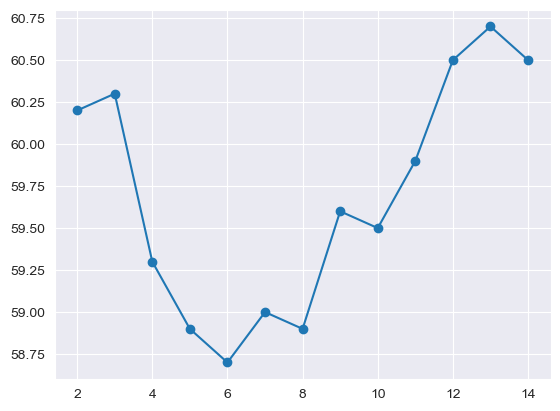

In [117]:
errors = []
for k in range(2,15):
    knn = neighbors.KNeighborsClassifier(k)
    errors.append(100*(1 - knn.fit(xtrain, ytrain).score(xtest, ytest)))
plt.plot(range(2,15), errors, 'o-')
plt.show()

In [118]:
knn = neighbors.KNeighborsClassifier(n_neighbors=2)
knn.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=2)

In [119]:
test = open_food_fact1[open_food_fact['nutrition-score-fr_100g'].isna()]
test = test[nutris]

C:\Users\houda\AppData\Local\Temp\ipykernel_6352\3651672764.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  test = open_food_fact1[open_food_fact['nutrition-score-fr_100g'].isna()]


In [120]:
y2 = test.drop(columns=["nutrition-score-fr_100g"])

In [121]:
predict = knn.predict(y2)
predict

C:\Users\houda\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([ 9.,  9.,  9., ...,  9., 10.,  9.])

In [122]:
test["nutrition-score-fr_100g"] = predict

In [123]:
for i in test['nutrition-score-fr_100g'].index:
    open_food_fact1.loc[i, 'nutrition-score-fr_100g'] = test['nutrition-score-fr_100g'].loc[i]

In [124]:
open_food_fact1.isnull().sum()

code                           0
product_name                   0
pnns_groups_1                  0
countries_tags                 0
countries_fr                   0
carbohydrates_100g             0
sugars_100g                    0
sucrose_100g                   0
glucose_100g                   0
fructose_100g                  0
lactose_100g                   0
maltose_100g                   0
nutrition-score-fr_100g        0
energy_100g                    0
proteins_100g                  0
nutrition_grade_fr         30102
dtype: int64

Categorisation of outliers for the nutrigrade by nutriscore values

In [125]:
for ind in open_food_fact1[open_food_fact1["nutrition_grade_fr"].isna()].index:
    a = open_food_fact1.loc[ind, 'nutrition-score-fr_100g']
    if (-15 >= a) and (a <= -2):
        open_food_fact1.loc[ind, "nutrition_grade_fr"] = 'a'
    elif (-1 >= a) and (a <= 3):
        open_food_fact1.loc[ind, "nutrition_grade_fr"] = 'b'
    elif (4 >= a) and (a <= 11):
        open_food_fact1.loc[ind, "nutrition_grade_fr"] = 'c'
    elif (12 >= a) and (a <= 16):
        open_food_fact1.loc[ind, "nutrition_grade_fr"] = 'd'
    else:
        open_food_fact1.loc[ind, "nutrition_grade_fr"] = 'e'

In [126]:
open_food_fact1[open_food_fact1['nutrition_grade_fr'].isnull()]

,code,product_name,pnns_groups_1,countries_tags,countries_fr,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,nutrition-score-fr_100g,energy_100g,proteins_100g,nutrition_grade_fr


In [127]:
open_food_fact1.isnull().sum()

code                       0
product_name               0
pnns_groups_1              0
countries_tags             0
countries_fr               0
carbohydrates_100g         0
sugars_100g                0
sucrose_100g               0
glucose_100g               0
fructose_100g              0
lactose_100g               0
maltose_100g               0
nutrition-score-fr_100g    0
energy_100g                0
proteins_100g              0
nutrition_grade_fr         0
dtype: int64

In [128]:
open_food_fact1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90155 entries, 0 to 320770
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   code                     90155 non-null  object 
 1   product_name             90155 non-null  object 
 2   pnns_groups_1            90155 non-null  object 
 3   countries_tags           90155 non-null  object 
 4   countries_fr             90155 non-null  object 
 5   carbohydrates_100g       90155 non-null  float64
 6   sugars_100g              90155 non-null  float64
 7   sucrose_100g             90155 non-null  float64
 8   glucose_100g             90155 non-null  float64
 9   fructose_100g            90155 non-null  float64
 10  lactose_100g             90155 non-null  float64
 11  maltose_100g             90155 non-null  float64
 12  nutrition-score-fr_100g  90155 non-null  float64
 13  energy_100g              90155 non-null  float64
 14  proteins_100g        

In [130]:
open_food_fact1.to_csv('data_clean.csv', index=False)